In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/others/feature_add-text-to-video_how-to2x.webp


In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 99 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

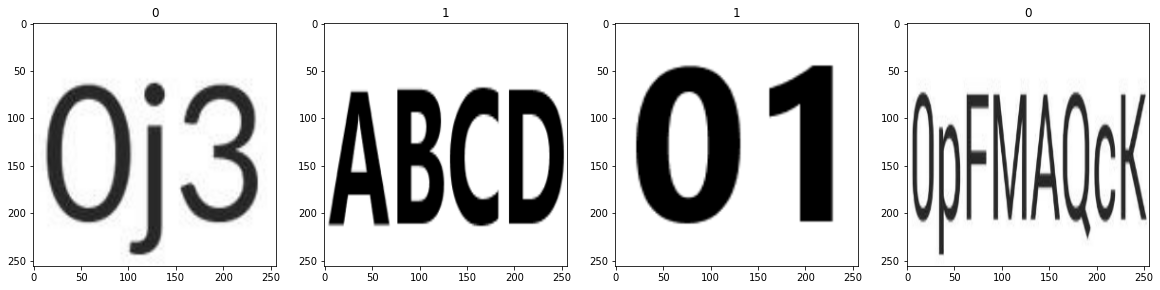

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

2

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [19]:
logdir='logs'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
2/2 [==============================] - 13s 65ms/step - loss: 2.1238 - accuracy: 0.5469
Epoch 2/30
2/2 [==============================] - 1s 46ms/step - loss: 0.7366 - accuracy: 0.5000
Epoch 3/30
2/2 [==============================] - 1s 48ms/step - loss: 0.5773 - accuracy: 0.6094
Epoch 4/30
2/2 [==============================] - 1s 56ms/step - loss: 0.4352 - accuracy: 0.7188
Epoch 5/30
2/2 [==============================] - 1s 57ms/step - loss: 0.3347 - accuracy: 0.9531
Epoch 6/30
2/2 [==============================] - 1s 56ms/step - loss: 0.3016 - accuracy: 0.9531
Epoch 7/30
2/2 [==============================] - 1s 56ms/step - loss: 0.2839 - accuracy: 0.9219
Epoch 8/30
2/2 [==============================] - 1s 58ms/step - loss: 0.1904 - accuracy: 0.9219
Epoch 9/30
2/2 [==============================] - 1s 56ms/step - loss: 0.1807 - accuracy: 0.9375
Epoch 10/30
2/2 [==============================] - 1s 56ms/step - loss: 0.1599 - accuracy: 0.9219
Epoch 11/30
2/2 [===========

KeyError: ignored

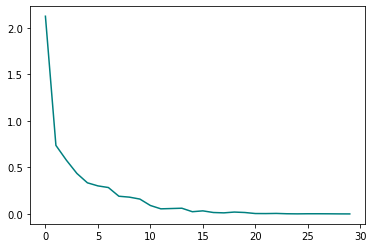

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: ignored

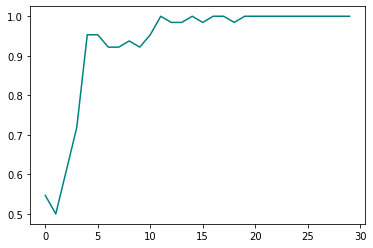

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
import cv2

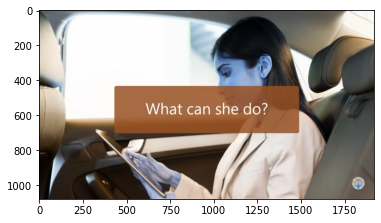

In [ ]:
img = cv2.imread('ja.png')
plt.imshow(img)
plt.show()

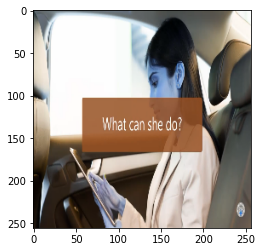

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 137ms/step


In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Others')
else:
    print(f'Predicted class is Segoeui')

Predicted class is Segoeui


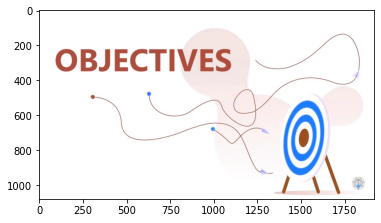

In [ ]:
img2 = cv2.imread('ja2.png')
plt.imshow(img2)
plt.show()

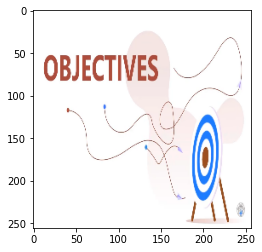

In [ ]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat2 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [ ]:
if yhat2 > 0.5: 
    print(f'Predicted class is Others')
else:
    print(f'Predicted class is Segoeui')

Predicted class is Segoeui


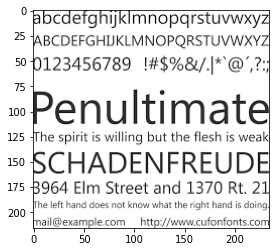

In [ ]:
img3 = cv2.imread('download.png')
plt.imshow(img3)
plt.show()

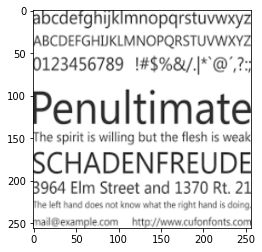

In [ ]:
resize = tf.image.resize(img3, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat3 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [ ]:
if yhat3 > 0.5: 
    print(f'Predicted class is Others')
else:
    print(f'Predicted class is Segoeui')

Predicted class is Segoeui


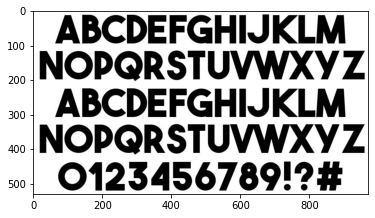

In [ ]:
img4 = cv2.imread('ja3.jpg')
plt.imshow(img4)
plt.show()

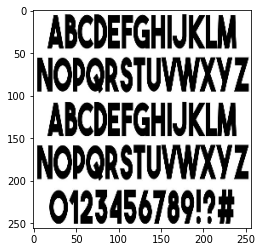

In [ ]:
resize = tf.image.resize(img4, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat4 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [ ]:
if yhat4 > 0.5: 
    print(f'Predicted class is Others')
else:
    print(f'Predicted class is Segoeui')

Predicted class is Others


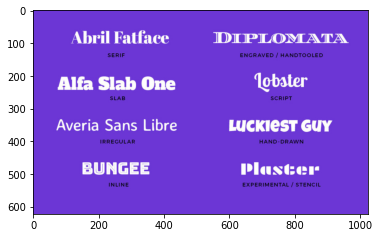

In [ ]:
img5= cv2.imread('ja4.jpg')
plt.imshow(img5)
plt.show()

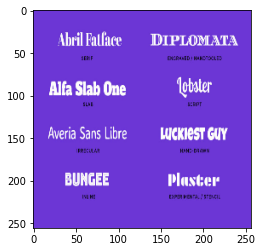

In [ ]:
resize = tf.image.resize(img5, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat5 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [ ]:
if yhat5 > 0.5: 
    print(f'Predicted class is Others')
else:
    print(f'Predicted class is Segoeui')

Predicted class is Others


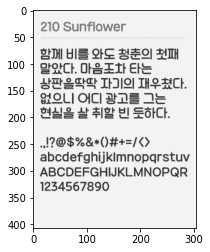

In [ ]:
img6= cv2.imread('kor.png')
plt.imshow(img6)
plt.show()

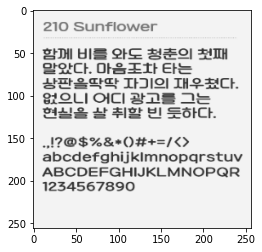

In [ ]:
resize = tf.image.resize(img6, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat6 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [ ]:
if yhat6 > 0.5: 
    print(f'Predicted class is Others')
else:
    print(f'Predicted class is Segoeui')

Predicted class is Segoeui
